# NLP (*The Count of Monte-Cristo*)


### Init

In [1]:
import re
import io
import requests

import numpy as np
import matplotlib.pyplot as plt
import nltk
import PIL

# Read the content of the book
with open('./res/CMC.txt', 'r', encoding='utf-8') as f:
    text = f.read()

### Data Cleaning

In [2]:
dumas = text.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[0]

def clean_text(text):
    text = text.lower()
    return ' '.join(text.split())

text = clean_text(dumas)

In [3]:
print(f"==>> text-length: { len(text) }")

==>> text-length: 722839


### Dictionary Visualization

In [4]:
import wordcloud

img = "https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))


def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(
        background_color="white",
        max_words=2000,
        mask=book_mask,
        contour_width=3,
        contour_color="steelblue",
    )
    wc.generate(corpus)
    return wc


wordcloud_dumas = make_wordcloud(text)

(-0.5, 1429.5, 783.5, -0.5)

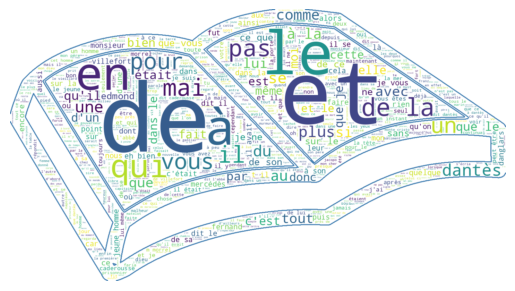

In [5]:
plt.imshow(wordcloud_dumas, interpolation="bilinear")
plt.axis("off")

### Tokenisation

In [6]:
words = nltk.word_tokenize(text, language="french")
words = [word for word in words if word.isalpha()] # filter none-alpha words

print(f"==>> words[1030:1050]: { words[1030:1050] }")
print(f"==>> words-length: { len(words) }")

==>> words[1030:1050]: ['assez', 'sombre', 'obséquieux', 'envers', 'ses', 'supérieurs', 'insolent', 'envers', 'ses', 'subordonnés', 'aussi', 'outre', 'son', 'titre', 'comptable', 'qui', 'est', 'toujours', 'un', 'motif']
==>> words-length: 111768


### Removing Stop Words

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("french"))
words = [ w for w in words if not w in stop_words ]

print(f"==>> words[1030:1050]: { words[1030:1050] }")

==>> words[1030:1050]: ['celui', 'dantès', 'a', 'déposé', 'passant', 'comment', 'paquet', 'déposer', 'danglars', 'rougit', 'passais', 'devant', 'porte', 'capitaine', 'entrouverte', 'vu', 'remettre', 'paquet', 'cette', 'lettre']


(-0.5, 1429.5, 783.5, -0.5)

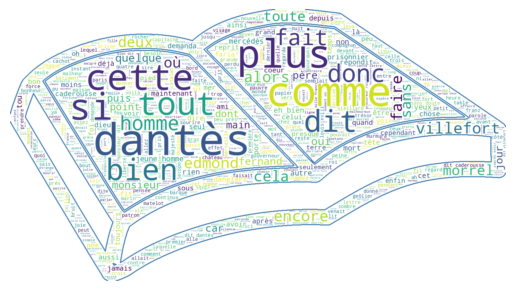

In [8]:
wc = make_wordcloud(" ".join(words))

fig = plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

### Stemming

In [9]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="french")
stemmed = [stemmer.stem(word) for word in words]

print(f"==>> stemmed[1030:1050]: { stemmed[1030:1050] }")

==>> stemmed[1030:1050]: ['celui', 'dantes', 'a', 'dépos', 'pass', 'comment', 'paquet', 'dépos', 'danglar', 'roug', 'pass', 'dev', 'port', 'capitain', 'entrouvert', 'vu', 'remettr', 'paquet', 'cet', 'lettr']


(-0.5, 1429.5, 783.5, -0.5)

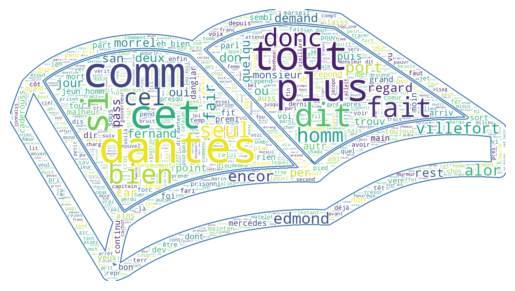

In [10]:
wc = make_wordcloud(" ".join(stemmed))

fig = plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")